In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100)


In [3]:
file_path1 = r"C:\Users\drgee\Desktop\GUVI\Birds project\Bird_Monitoring_Data_GRASSLAND.XLSX"
data = pd.ExcelFile(file_path1)

sheet_names = data.sheet_names

sheet_dicts = {sheet: data.parse(sheet) for sheet in sheet_names}

original_grassland_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheet_dicts.items() if not df.empty],
    ignore_index=True
).drop(columns='Sub_Unit_Code')

original_grassland_df['Admin_Unit_Code'].unique()

array(['ANTI', 'HAFE', 'MANA', 'MONO'], dtype=object)

In [4]:
file_path1 = r"C:\Users\drgee\Desktop\GUVI\Birds project\Bird_Monitoring_Data_FOREST.XLSX"
data = pd.ExcelFile(file_path1)

sheet_names = data.sheet_names

sheet_dicts = {sheet: data.parse(sheet) for sheet in sheet_names}

original_forest_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheet_dicts.items() if not df.empty],
    ignore_index=True
).drop(columns='Sub_Unit_Code')

original_forest_df['Admin_Unit_Code'].unique()

array(['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE',
       'PRWI', 'ROCR', 'WOTR'], dtype=object)

In [5]:
original_grassland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8531 non-null   object        
 1   Plot_Name                    8531 non-null   object        
 2   Location_Type                8531 non-null   object        
 3   Year                         8531 non-null   int64         
 4   Date                         8531 non-null   datetime64[ns]
 5   Start_Time                   8531 non-null   object        
 6   End_Time                     8531 non-null   object        
 7   Observer                     8531 non-null   object        
 8   Visit                        8531 non-null   int64         
 9   Interval_Length              8531 non-null   object        
 10  ID_Method                    8530 non-null   object        
 11  Distance                     7137 non-null 

In [6]:
original_grassland_df.columns

Index(['Admin_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date',
       'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length',
       'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name',
       'Scientific_Name', 'AcceptedTSN', 'TaxonCode', 'AOU_Code',
       'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature',
       'Humidity', 'Sky', 'Wind', 'Disturbance', 'Previously_Obs',
       'Initial_Three_Min_Cnt', 'Sheet'],
      dtype='object')

In [7]:
grassland_df = original_grassland_df[['Admin_Unit_Code', 
        'Plot_Name', 'Location_Type', 'Year',
       'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit',
       'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex',
       'Common_Name', 'Scientific_Name',
        #  'AcceptedTSN', 'NPSTaxonCode', 
        'AOU_Code', 
        'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt',
        #  'Sheet'
        ]].copy()

In [8]:
grassland_df.columns

Index(['Admin_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date',
       'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length',
       'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name',
       'Scientific_Name', 'AOU_Code', 'PIF_Watchlist_Status',
       'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind',
       'Disturbance', 'Initial_Three_Min_Cnt'],
      dtype='object')

In [9]:
grassland_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Initial_Three_Min_Cnt             0
dtype: int64

In [10]:
grassland_df['ID_Method'] = grassland_df['ID_Method'].fillna(grassland_df['ID_Method'].mode()[0])


In [11]:
grassland_df['Distance'] = grassland_df['Distance'].fillna('Flyover')

### Forest DF Preprocesing


In [12]:
original_forest_df.columns

Index(['Admin_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year',
       'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit',
       'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex',
       'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'Sheet'],
      dtype='object')

In [13]:
forest_df = original_forest_df[['Admin_Unit_Code', 
        #    'Site_Name', 
        'Plot_Name', 'Location_Type', 'Year',
       'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit',
       'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex',
       'Common_Name', 'Scientific_Name',
        #  'AcceptedTSN', 'NPSTaxonCode', 
        'AOU_Code', 
        'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt',
        #  'Sheet'
        ]].copy()

In [14]:
forest_df.isna().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Initial_Three_Min_Cnt             0
dtype: int64

In [15]:
forest_df.shape

(8546, 25)

In [16]:
forest_df['ID_Method'] = forest_df['ID_Method'].fillna(forest_df['ID_Method'].mode()[0])

In [17]:
forest_df['Distance'] = forest_df['Distance'].fillna('Flyover')

In [18]:
nan_sex = forest_df[(forest_df['Sex'].isna())].loc[:, ['Common_Name', 'Scientific_Name']].copy()

In [19]:
for index, row in nan_sex.iterrows():
    filtered = forest_df.loc[
    (forest_df['Common_Name'] == row['Common_Name']) &
    (forest_df['Scientific_Name'] == row['Scientific_Name']) &
    (forest_df['Sex'].notna()),
    'Sex'
]

    if not filtered.empty:
        correct_sex = filtered.mode().iloc[0] 
        forest_df.at[index, 'Sex'] = correct_sex

    else:
        forest_df.at[index, 'Sex'] = 'Undetermined'

In [20]:
grassland_df['Date'].dt.month.unique()

array([5, 6, 7], dtype=int32)

In [21]:
forest_df['Sex'].value_counts()

Sex
Undetermined    7780
Male             766
Name: count, dtype: int64

In [22]:
grassland_df.columns

Index(['Admin_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date',
       'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length',
       'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name',
       'Scientific_Name', 'AOU_Code', 'PIF_Watchlist_Status',
       'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind',
       'Disturbance', 'Initial_Three_Min_Cnt'],
      dtype='object')

In [23]:
grassland_df.columns = [col.lower() for col in grassland_df.columns]

In [24]:
forest_df.columns

Index(['Admin_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date',
       'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length',
       'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name',
       'Scientific_Name', 'AOU_Code', 'PIF_Watchlist_Status',
       'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind',
       'Disturbance', 'Initial_Three_Min_Cnt'],
      dtype='object')

In [25]:
forest_df.columns = [col.lower() for col in forest_df.columns]

In [26]:
grassland_df.columns

Index(['admin_unit_code', 'plot_name', 'location_type', 'year', 'date',
       'start_time', 'end_time', 'observer', 'visit', 'interval_length',
       'id_method', 'distance', 'flyover_observed', 'sex', 'common_name',
       'scientific_name', 'aou_code', 'pif_watchlist_status',
       'regional_stewardship_status', 'temperature', 'humidity', 'sky', 'wind',
       'disturbance', 'initial_three_min_cnt'],
      dtype='object')

### Creating grassland and forest Table

In [27]:
from sqlalchemy import create_engine
import psycopg2

host = "localhost"
port = "5432"
database = "Bird_Species"
username = "postgres"
password = "password"

In [28]:
# connection = psycopg2.connect(
#     dbname=database, user=username, password=password, host=host, port=port
# )
# cursor = connection.cursor()

# cursor.execute("""
#     CREATE TABLE grassland (
#     admin_unit_code              TEXT,
#     plot_name                    TEXT,
#     location_type                TEXT,
#     year                         INTEGER,
#     date                         TIMESTAMP,
#     start_time                   TEXT,
#     end_time                     TEXT,
#     observer                     TEXT,
#     visit                        INTEGER,
#     interval_length              TEXT,
#     id_method                    TEXT,
#     distance                     TEXT,
#     flyover_observed             BOOLEAN,
#     sex                          TEXT,
#     common_Name                  TEXT,
#     scientific_name              TEXT,
#     aou_code                     TEXT,
#     pif_watchlist_status         BOOLEAN,
#     regional_stewardship_status  BOOLEAN,
#     temperature                  FLOAT,
#     humidity                     FLOAT,
#     sky                          TEXT,
#     wind                         TEXT,
#     disturbance                  TEXT,
#     initial_three_min_cnt        BOOLEAN
# )
# """)

# connection.commit()
# cursor.close()
# connection.close()


# print("Table created!")

In [29]:
# connection = psycopg2.connect(
#     dbname=database, user=username, password=password, host=host, port=port
# )
# cursor = connection.cursor()

# cursor.execute("""
#     CREATE TABLE forest (
#     admin_unit_code              TEXT,
#     plot_name                    TEXT,
#     location_type                TEXT,
#     year                         INTEGER,
#     date                         TIMESTAMP,
#     start_time                   TEXT,
#     end_time                     TEXT,
#     observer                     TEXT,
#     visit                        INTEGER,
#     interval_length              TEXT,
#     id_method                    TEXT,
#     distance                     TEXT,
#     flyover_observed             BOOLEAN,
#     sex                          TEXT,
#     common_name                  TEXT,
#     scientific_name              TEXT,
#     aou_code                     TEXT,
#     pif_watchlist_status         BOOLEAN,
#     regional_stewardship_status  BOOLEAN,
#     temperature                  FLOAT,
#     humidity                     FLOAT,
#     sky                          TEXT,
#     wind                         TEXT,
#     disturbance                  TEXT,
#     initial_three_min_cnt        BOOLEAN
# )
# """)

# connection.commit()
# cursor.close()
# connection.close()


# print("Table created!")

### Inserting data into the tables

In [30]:
# engine_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"
# engine = create_engine(engine_string)

# grassland_df.to_sql('grassland', engine, if_exists='append', index=False)

# print("Data successfully pushed to PostgreSQL!")

In [31]:
# engine_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"
# engine = create_engine(engine_string)

# forest_df.to_sql('forest', engine, if_exists='append', index=False)

# print("Data successfully pushed to PostgreSQL!")

### Visualization 

### Seasonal Trends:

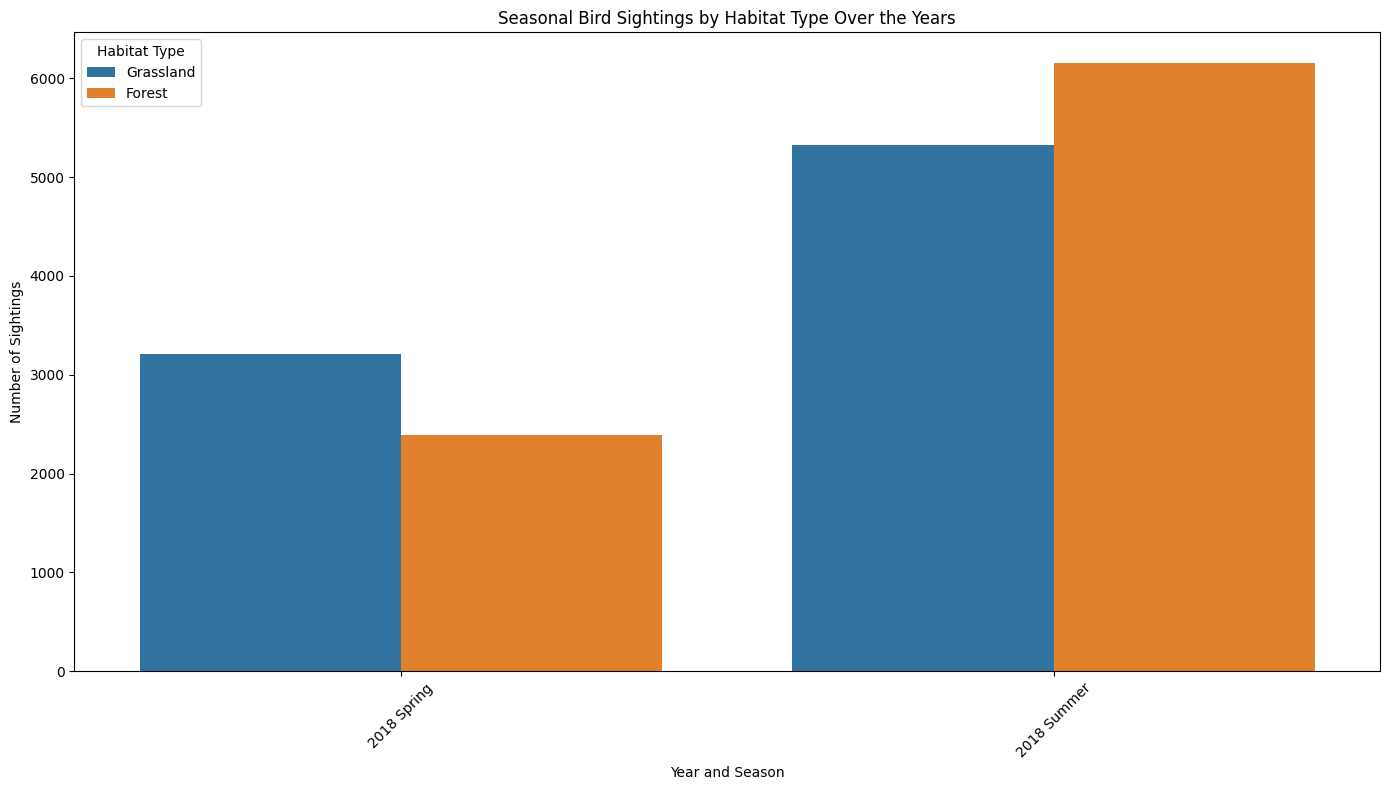

In [ ]:

# SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

grassland_query = """
SELECT 
    'Grassland' AS habitat,
    CASE 
        WHEN EXTRACT(MONTH FROM date) IN (12, 1, 2) THEN 'Winter'
        WHEN EXTRACT(MONTH FROM date) IN (3, 4, 5) THEN 'Spring'
        WHEN EXTRACT(MONTH FROM date) IN (6, 7, 8) THEN 'Summer'
        WHEN EXTRACT(MONTH FROM date) IN (9, 10, 11) THEN 'Autumn'
    END AS season,
    year,
    COUNT(*) AS sightings
FROM grassland
GROUP BY habitat, season, year
ORDER BY year, season;
"""

forest_query = """
SELECT 
    'Forest' AS habitat,
    CASE 
        WHEN EXTRACT(MONTH FROM date) IN (12, 1, 2) THEN 'Winter'
        WHEN EXTRACT(MONTH FROM date) IN (3, 4, 5) THEN 'Spring'
        WHEN EXTRACT(MONTH FROM date) IN (6, 7, 8) THEN 'Summer'
        WHEN EXTRACT(MONTH FROM date) IN (9, 10, 11) THEN 'Autumn'
    END AS season,
    year,
    COUNT(*) AS sightings
FROM forest
GROUP BY habitat, season, year
ORDER BY year, season;
"""

grassland_df = pd.read_sql_query(grassland_query, engine)
forest_df = pd.read_sql_query(forest_query, engine)

combined_df = pd.concat([grassland_df, forest_df])

combined_df['year_season'] = combined_df['year'].astype(str) + ' ' + combined_df['season']

plt.figure(figsize=(14, 8))

sns.barplot(
    data=combined_df, 
    x="year_season", 
    y="sightings", 
    hue="habitat"
)

plt.title("Seasonal Bird Sightings by Habitat Type Over the Years")
plt.ylabel("Number of Sightings")
plt.xlabel("Year and Season")
plt.legend(title="Habitat Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation Time:

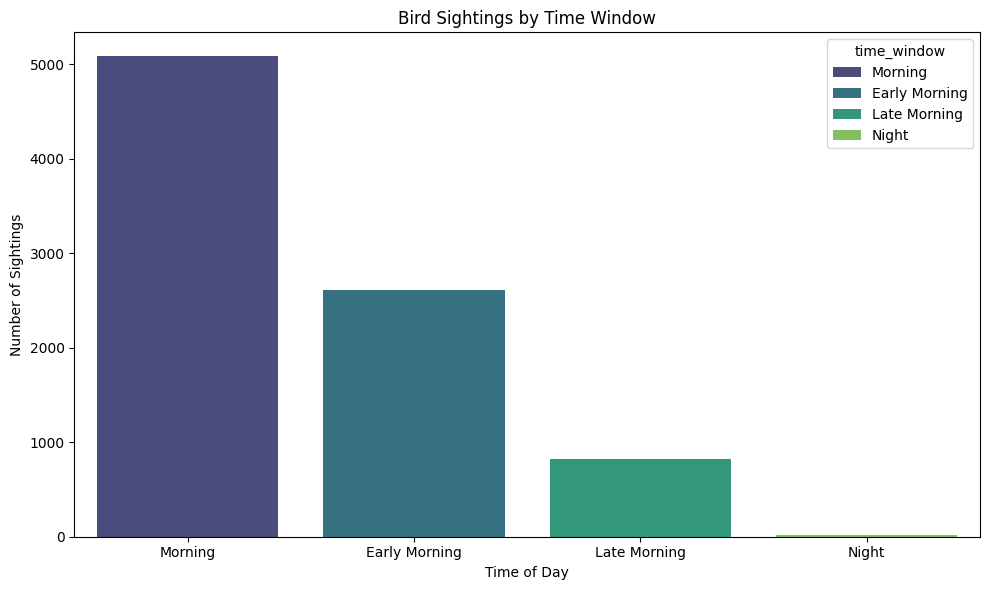

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')


query = """
SELECT 
    CASE 
        WHEN start_time BETWEEN '04:00' AND '06:59' THEN 'Early Morning'
        WHEN start_time BETWEEN '07:00' AND '09:59' THEN 'Morning'
        WHEN start_time BETWEEN '10:00' AND '12:59' THEN 'Late Morning'
        WHEN start_time BETWEEN '13:00' AND '15:59' THEN 'Afternoon'
        WHEN start_time BETWEEN '16:00' AND '18:59' THEN 'Evening'
        ELSE 'Night'
    END AS time_window,
    COUNT(*) AS bird_sightings
FROM grassland
GROUP BY time_window
ORDER BY bird_sightings DESC;
"""

time_df = pd.read_sql_query(query, engine)

plt.figure(figsize=(10, 6))
sns.barplot(x='time_window', y='bird_sightings', palette='viridis', data=time_df, hue='time_window', legend=True)
plt.title("Bird Sightings by Time Window")
plt.xlabel("Time of Day")
plt.ylabel("Number of Sightings")
plt.tight_layout()
plt.show()

### Location Insights

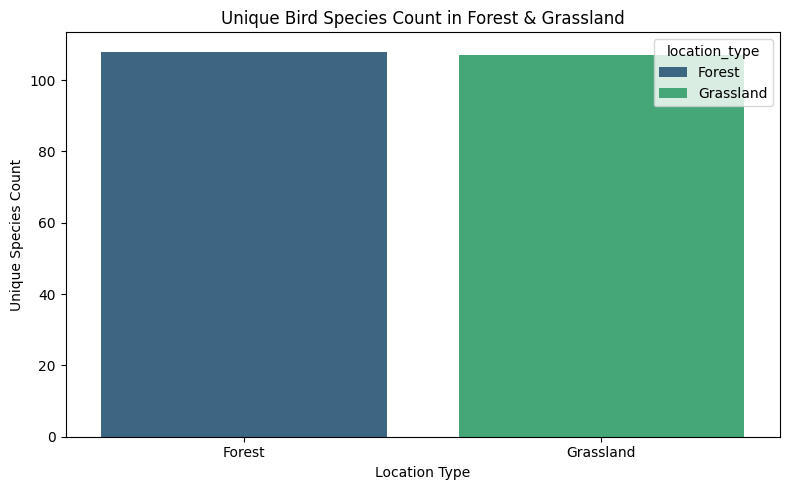

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

query = """
SELECT 
    location_type,
    COUNT(DISTINCT scientific_name) AS unique_species_count
FROM (
    SELECT location_type, scientific_name FROM grassland
    UNION ALL
    SELECT location_type, scientific_name FROM forest
)
GROUP BY location_type
ORDER BY unique_species_count DESC;
"""

biodiversity_df = pd.read_sql_query(query, engine)

plt.figure(figsize=(8,5))
sns.barplot(x='location_type', y='unique_species_count', data=biodiversity_df, palette='viridis', hue='location_type', legend=True)
plt.title('Unique Bird Species Count in Forest & Grassland')
plt.xlabel('Location Type')
plt.ylabel('Unique Species Count')
plt.tight_layout()
plt.show()

### Plot-Level Analysis

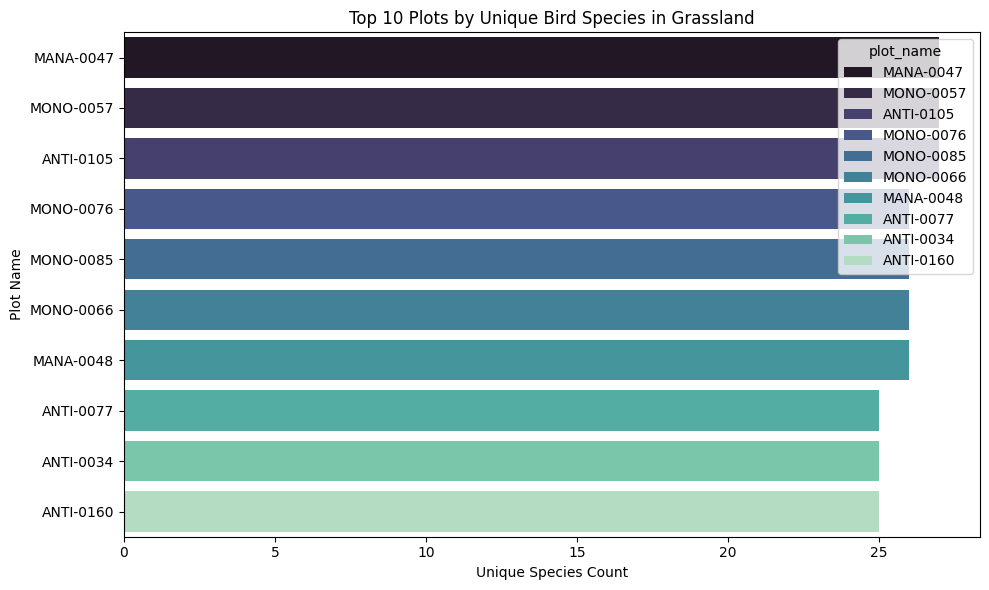

In [ ]:
query = """
SELECT 
    plot_name,
    COUNT(DISTINCT scientific_name) AS unique_species_count
FROM grassland
GROUP BY plot_name
ORDER BY unique_species_count DESC;
"""

plot_df = pd.read_sql_query(query, engine)

top_n = plot_df.head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='plot_name', x='unique_species_count', data=top_n, palette='mako', hue='plot_name', legend=True)
plt.title('Top 10 Plots by Unique Bird Species in Grassland')
plt.xlabel('Unique Species Count')
plt.ylabel('Plot Name')
plt.tight_layout()
plt.show()

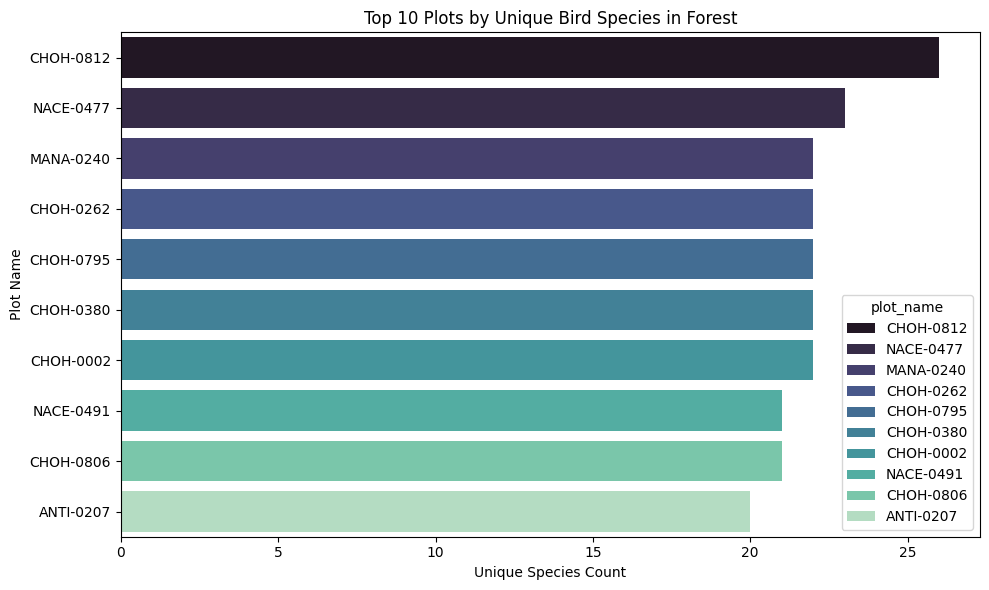

In [ ]:
query = """
SELECT 
    plot_name,
    COUNT(DISTINCT scientific_name) AS unique_species_count
FROM forest
GROUP BY plot_name
ORDER BY unique_species_count DESC;
"""

plot_df = pd.read_sql_query(query, engine)

top_n = plot_df.head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='plot_name', x='unique_species_count', data=top_n, palette='mako', hue='plot_name', legend=True)
plt.title('Top 10 Plots by Unique Bird Species in Forest')
plt.xlabel('Unique Species Count')
plt.ylabel('Plot Name')
plt.tight_layout()
plt.show()

### Diversity Metrics

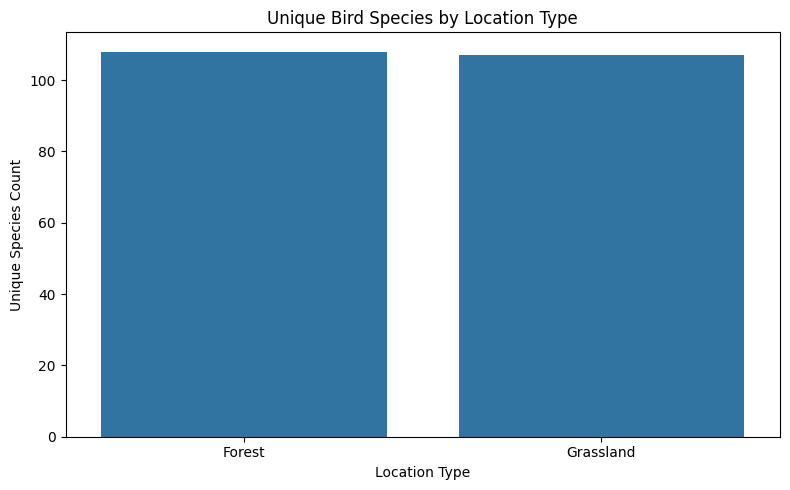

In [37]:
query = """
SELECT 
    location_type,
    COUNT(DISTINCT scientific_name) AS unique_species_count
FROM (
    SELECT location_type, scientific_name FROM grassland
    UNION ALL
    SELECT location_type, scientific_name FROM forest
) AS all_data
GROUP BY location_type
ORDER BY unique_species_count DESC;
"""

diversity_df = pd.read_sql_query(query, engine)

plt.figure(figsize=(8,5))
sns.barplot(x='location_type', y='unique_species_count', data=diversity_df)
plt.title('Unique Bird Species by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Unique Species Count')
plt.tight_layout()
plt.show()

### Activity Patterns: 

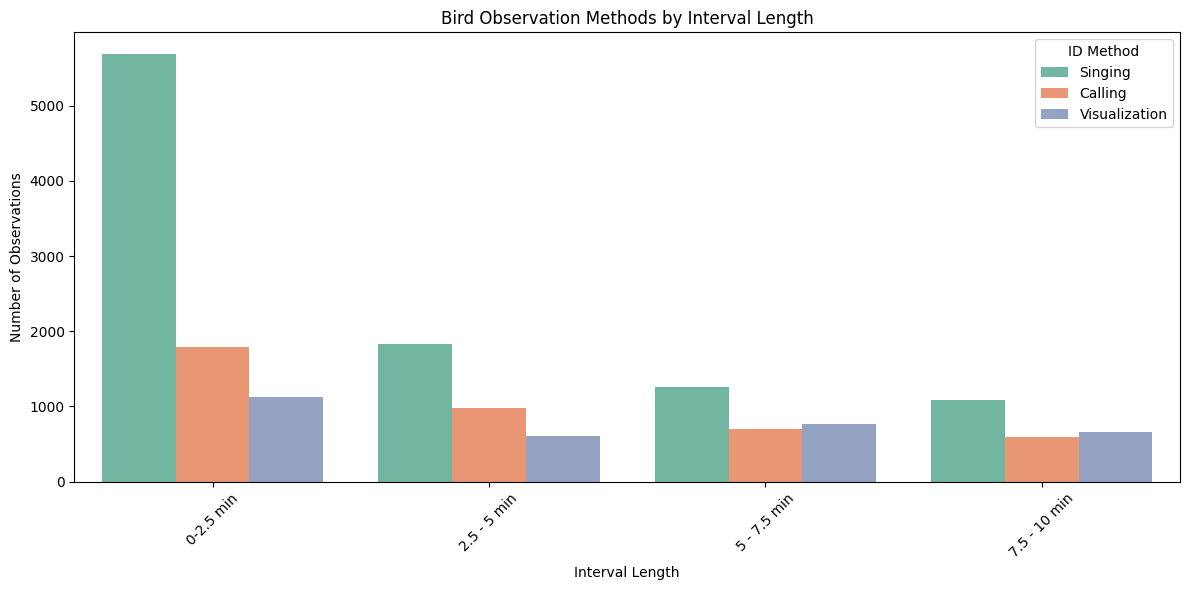

In [38]:
query = """
SELECT 
    id_method,
    interval_length,
    COUNT(*) AS observations
FROM (
    SELECT id_method, interval_length FROM grassland
    UNION ALL
    SELECT id_method, interval_length FROM forest
) AS all_data
GROUP BY id_method, interval_length
ORDER BY observations DESC;
"""

activity_df = pd.read_sql_query(query, engine)

plt.figure(figsize=(12,6))
sns.barplot(
    x='interval_length',
    y='observations',
    hue='id_method',
    data=activity_df,
    palette='Set2'
)
plt.title('Bird Observation Methods by Interval Length')
plt.xlabel('Interval Length')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='ID Method')
plt.tight_layout()
plt.show()

### Disturbance Effect: 
Assess the impact of Disturbance (e.g., slight effect) on bird sightings. 

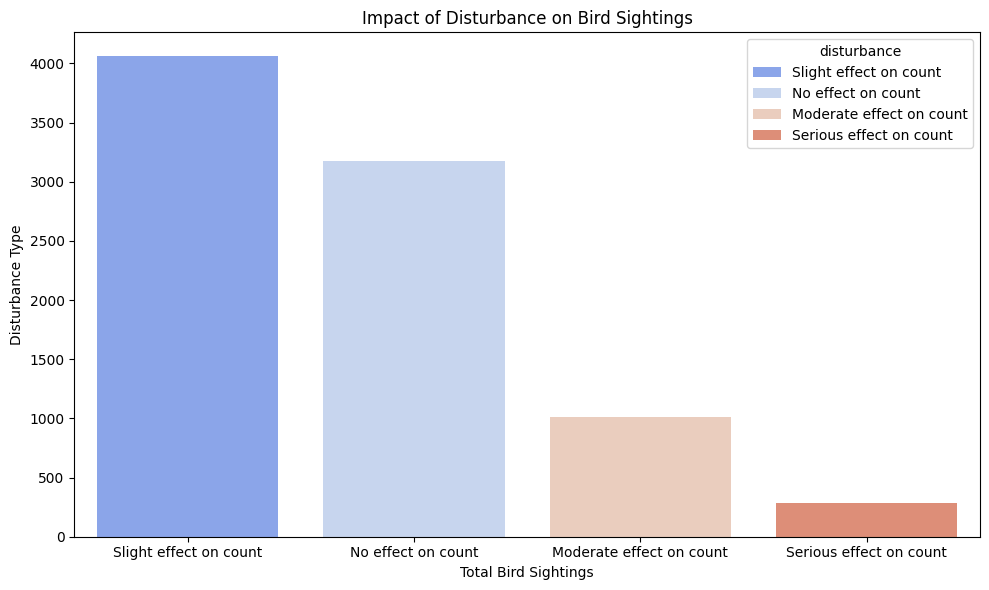

In [39]:
query = """
SELECT
    Disturbance,
    COUNT(*) AS total_sightings,
    COUNT(DISTINCT Scientific_Name) AS unique_species
FROM
    grassland
GROUP BY
    Disturbance
ORDER BY
    total_sightings DESC;
"""

disturbance_effect = pd.read_sql_query(query, engine)

disturbance_effect

plt.figure(figsize=(10,6))
sns.barplot(data=disturbance_effect, y="total_sightings", x="disturbance", palette="coolwarm", hue='disturbance', legend=True)
plt.title("Impact of Disturbance on Bird Sightings")
plt.xlabel("Total Bird Sightings")
plt.ylabel("Disturbance Type")
plt.tight_layout()
plt.show()



### Observer Bias:

C:\Users\drgee\AppData\Local\Temp\ipykernel_360764\4167519347.py:41: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("sightings", ascending=False).head(6))


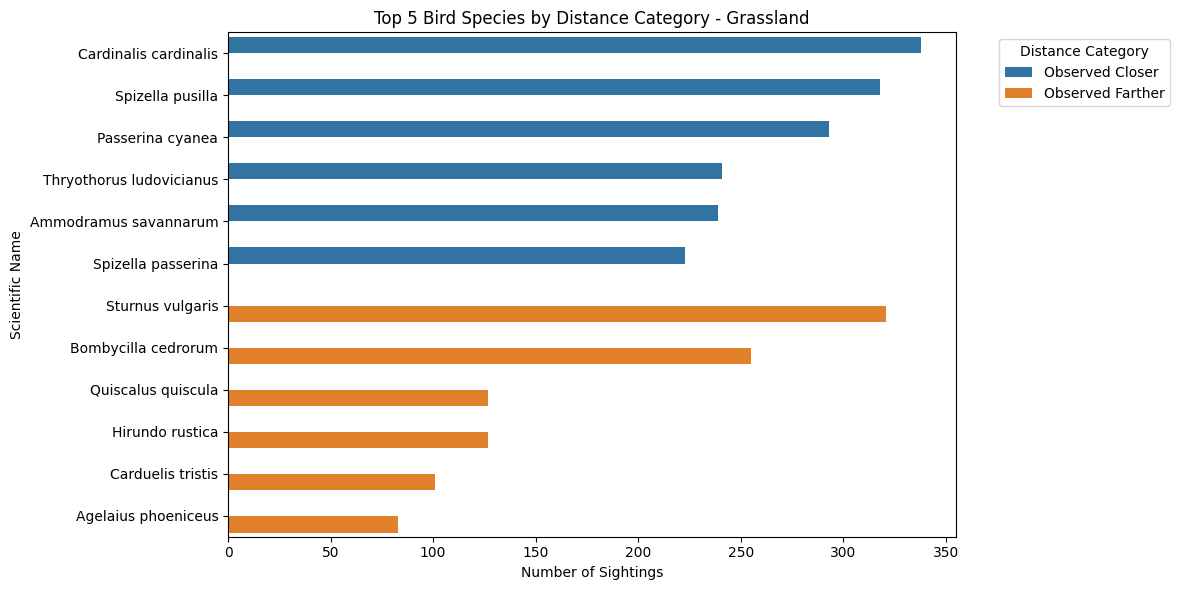

In [ ]:
query_grassland = """
SELECT
    Distance,
    Scientific_Name,
    COUNT(*) AS Sightings,
    'Grassland' AS Habitat
FROM grassland
GROUP BY Distance, Scientific_Name
"""

query_forest = """
SELECT
    Distance,
    Scientific_Name,
    COUNT(*) AS Sightings,
    'Forest' AS Habitat
FROM forest
GROUP BY Distance, Scientific_Name
"""

df_grassland = pd.read_sql_query(query_grassland, engine)
df_forest = pd.read_sql_query(query_forest, engine)


combined_df = pd.concat([df_grassland, df_forest], ignore_index=True)

def categorize_distance(d):
    if d in ['<= 50 Meters', '50 - 100 Meters']:
        return 'Observed Closer'
    elif d == 'Flyover':
        return 'Observed Farther'

combined_df["distance_category"] = combined_df["distance"].apply(categorize_distance)



top_species = (
    combined_df.groupby(["habitat", "distance_category"], group_keys=False)
    .apply(lambda x: x.sort_values("sightings", ascending=False).head(6))
)

habitat_filter =   "Grassland" 

filtered_df = top_species[top_species["habitat"] == habitat_filter]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_df,
    x="sightings",
    y="scientific_name",
    hue="distance_category",
    dodge=True
)
plt.title(f"Top 5 Bird Species by Distance Category - {habitat_filter}")
plt.xlabel("Number of Sightings")
plt.ylabel("Scientific Name")
plt.legend(title="Distance Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




### Observer Bias:

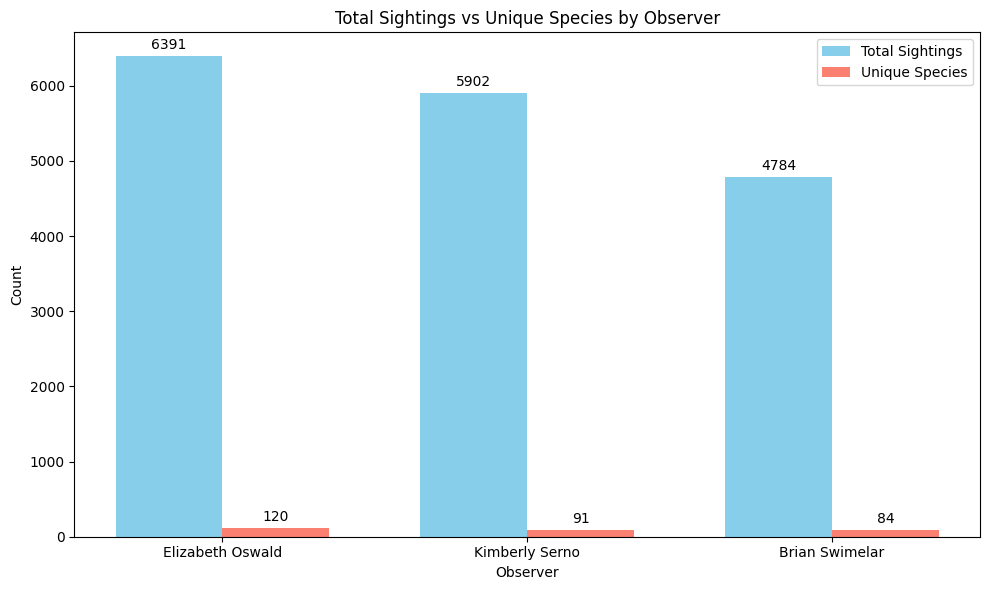

In [ ]:
from sqlalchemy import create_engine, text

query = """
SELECT
    observer,
    COUNT(*) AS total_sightings,
    COUNT(DISTINCT scientific_name) AS unique_species
FROM (
    SELECT observer, scientific_name FROM grassland
    UNION ALL
    SELECT observer, scientific_name FROM forest
) AS combined
GROUP BY observer
ORDER BY total_sightings DESC;
"""

df= pd.read_sql_query(query, engine)

observers = df['observer']
x = np.arange(len(observers)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['total_sightings'], width, label='Total Sightings', color='skyblue')
bar2 = ax.bar(x + width/2, df['unique_species'], width, label='Unique Species', color='salmon')


ax.set_xlabel('Observer')
ax.set_ylabel('Count')
ax.set_title('Total Sightings vs Unique Species by Observer')
ax.set_xticks(x)
ax.set_xticklabels(observers, rotation=0)
ax.legend()
ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

plt.tight_layout()
plt.show()

### Visit Patterns

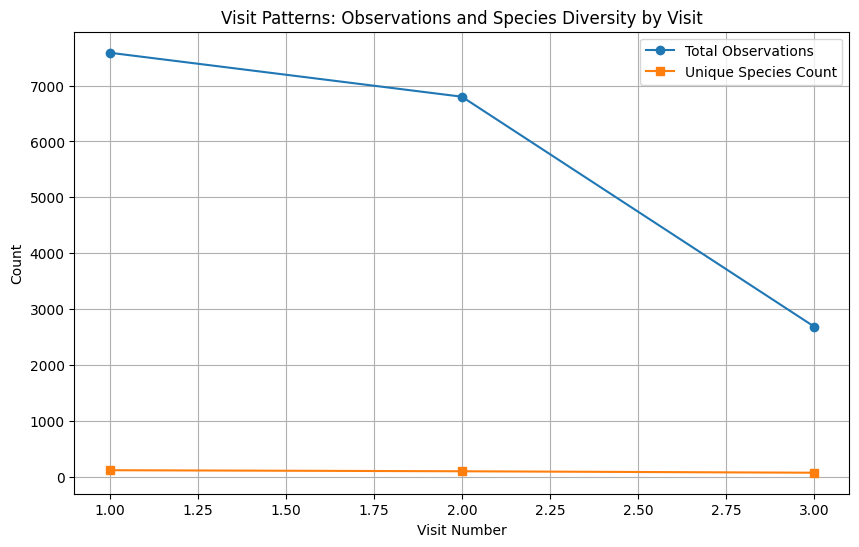

In [ ]:
query = """
SELECT
    Visit,
    COUNT(*) AS total_observations,
    COUNT(DISTINCT Scientific_Name) AS unique_species_count
FROM (
    SELECT Visit, Scientific_Name FROM grassland
    UNION ALL
    SELECT Visit, Scientific_Name FROM forest
) AS combined
GROUP BY Visit
ORDER BY Visit;
"""

df= pd.read_sql_query(query, engine)


plt.figure(figsize=(10,6))
plt.plot(df['visit'], df['total_observations'], marker='o', label='Total Observations')
plt.plot(df['visit'], df['unique_species_count'], marker='s', label='Unique Species Count')
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Visit Patterns: Observations and Species Diversity by Visit')
plt.legend()
plt.grid(True)
plt.show()

### Sex Ratio

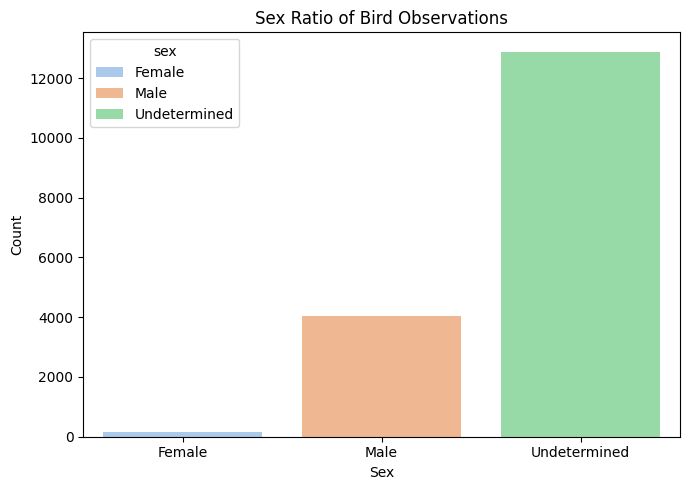

In [ ]:
query = """
SELECT 
    Sex,
    COUNT(*) AS count
FROM (
    SELECT Sex FROM grassland
    UNION ALL
    SELECT Sex FROM forest
) AS combined
GROUP BY Sex;
"""

df = pd.read_sql_query(query, engine)

plt.figure(figsize=(7,5))
sns.barplot(data=df, x='sex', y='count', palette='pastel', hue='sex', legend=True)
plt.title("Sex Ratio of Bird Observations")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Weather Correlation

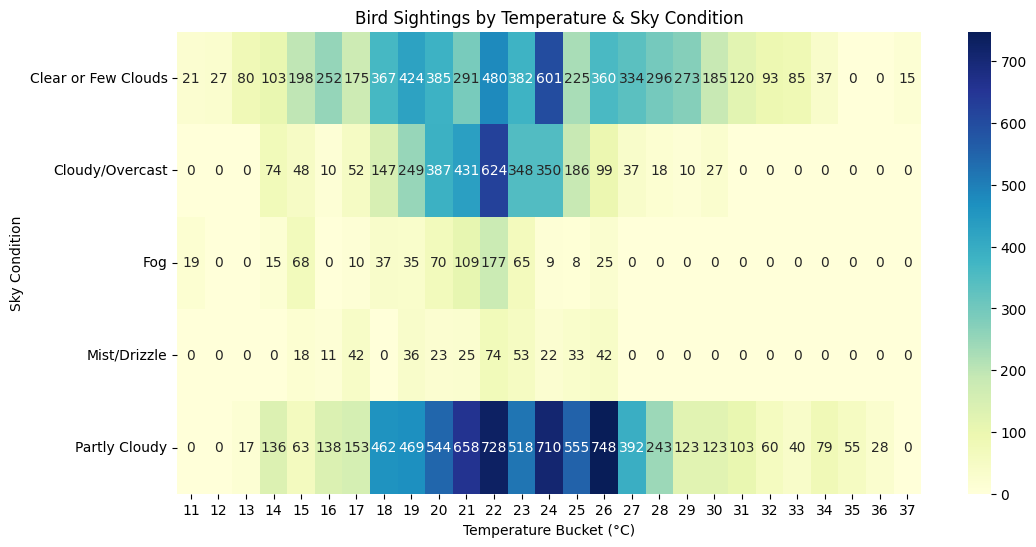

In [ ]:
query = """
SELECT 
    Sky,
    ROUND(Temperature)::int AS temperature_bucket,
    COUNT(*) AS sightings
FROM (
    SELECT Sky, Temperature FROM grassland
    UNION ALL
    SELECT Sky, Temperature FROM forest
) AS combined
WHERE Temperature IS NOT NULL
GROUP BY Sky, temperature_bucket
ORDER BY Sky, temperature_bucket;
"""

df = pd.read_sql_query(query, engine)
pivot = df.pivot(index='sky', columns='temperature_bucket', values='sightings').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Bird Sightings by Temperature & Sky Condition")
plt.xlabel("Temperature Bucket (°C)")
plt.ylabel("Sky Condition")
plt.show()

### Watchlist Trends

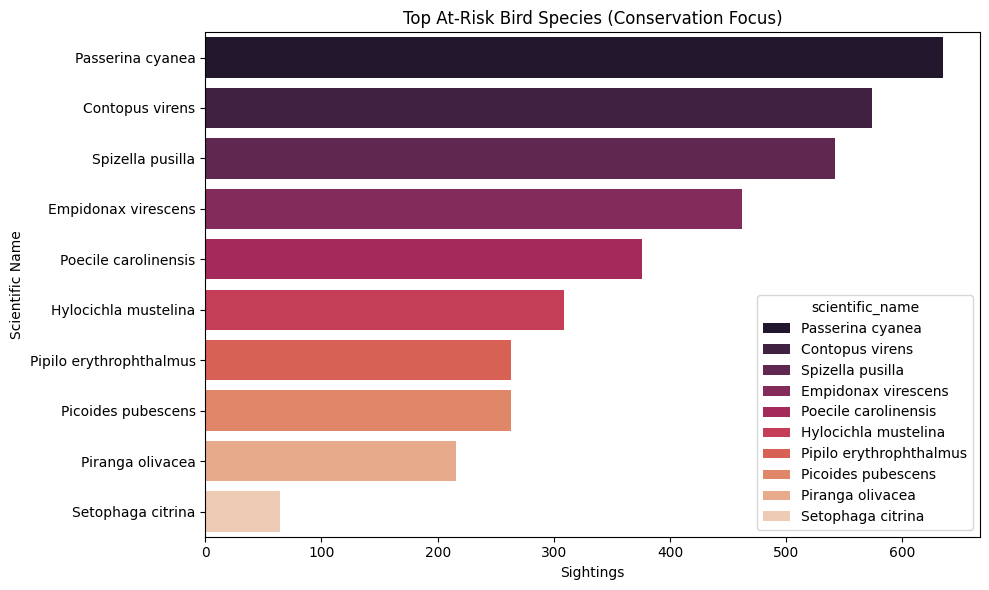

In [ ]:
query = """
SELECT 
    scientific_name,
    COUNT(*) AS sightings,
    SUM(CASE WHEN PIF_Watchlist_Status THEN 1 ELSE 0 END) AS watchlist,
    SUM(CASE WHEN Regional_Stewardship_Status THEN 1 ELSE 0 END) AS stewardship
FROM (
    SELECT Scientific_Name, PIF_Watchlist_Status, Regional_Stewardship_Status FROM grassland
    UNION ALL
    SELECT Scientific_Name, PIF_Watchlist_Status, Regional_Stewardship_Status FROM forest
) AS combined
GROUP BY Scientific_Name
HAVING 
    SUM(CASE WHEN PIF_Watchlist_Status THEN 1 ELSE 0 END) > 0
    OR SUM(CASE WHEN Regional_Stewardship_Status THEN 1 ELSE 0 END) > 0
ORDER BY sightings DESC
LIMIT 10;

"""

df = pd.read_sql_query(query, engine)

plt.figure(figsize=(10,6))
sns.barplot(data=df, y='scientific_name', x='sightings', orient='h', palette='rocket', hue='scientific_name', legend=True)
plt.title("Top At-Risk Bird Species (Conservation Focus)")
plt.xlabel("Sightings")
plt.ylabel("Scientific Name")
plt.tight_layout()
plt.show()


### AOU Code Patterns

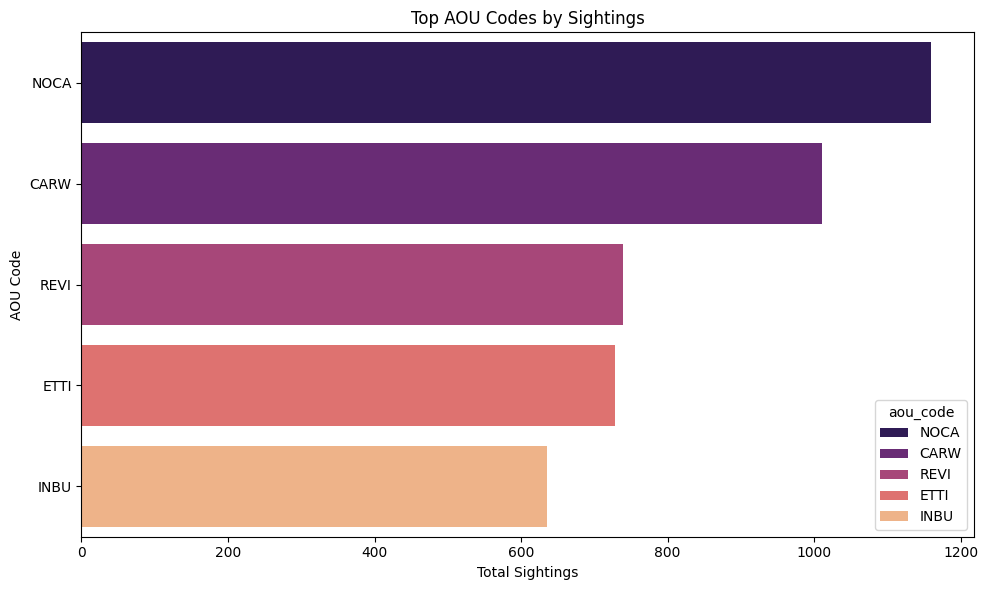

In [ ]:
query = """
SELECT 
    AOU_Code,
    COUNT(*) AS total_sightings,
    COUNT(DISTINCT Scientific_Name) AS unique_species,
    SUM(CASE WHEN PIF_Watchlist_Status THEN 1 ELSE 0 END) AS watchlist_count,
    SUM(CASE WHEN Regional_Stewardship_Status THEN 1 ELSE 0 END) AS stewardship_count
FROM (
    SELECT AOU_Code, Scientific_Name, PIF_Watchlist_Status, Regional_Stewardship_Status FROM grassland
    UNION ALL
    SELECT AOU_Code, Scientific_Name, PIF_Watchlist_Status, Regional_Stewardship_Status FROM forest
) AS combined
GROUP BY AOU_Code
ORDER BY total_sightings DESC
LIMIT 5;
"""

df = pd.read_sql_query(query, engine)

plt.figure(figsize=(10,6))
sns.barplot(data=df, y='aou_code', x='total_sightings', orient='h', palette='magma', hue='aou_code', legend=True)
plt.title("Top AOU Codes by Sightings")
plt.xlabel("Total Sightings")
plt.ylabel("AOU Code")
plt.tight_layout()
plt.show()